In [1]:
import matplotlib.pyplot as plt
import seaborn

seaborn.set_theme()


### Artificial Data
Data for good, okish/ medium, and bad example cases.

In [2]:
data = [
    {
        "label": "Bad Case",
        "color": "red",
        "abstention_rate": [0, 0.1, 0.2, 0.9],
        "max_error": [11, 10, 8, 3],
    },
    {
        "label": "Medium Case",
        "color": "orange",
        "abstention_rate": [0, 0.5, 0.6, 0.65, 0.8, 0.95],
        "max_error": [5, 4.5, 4, 2.9, 2.5, 1.9],
    },
    {
        "label": "Good Case",
        "color": "green",
        "abstention_rate": [0, 0.05, 0.08, 0.1, 0.2, 0.29, 0.3, 0.8, 0.9, 0.95],
        "max_error": [4, 3.5, 3, 2, 1.3, 1, 0.5, 0.45, 0.3, 0.2],
    },
]


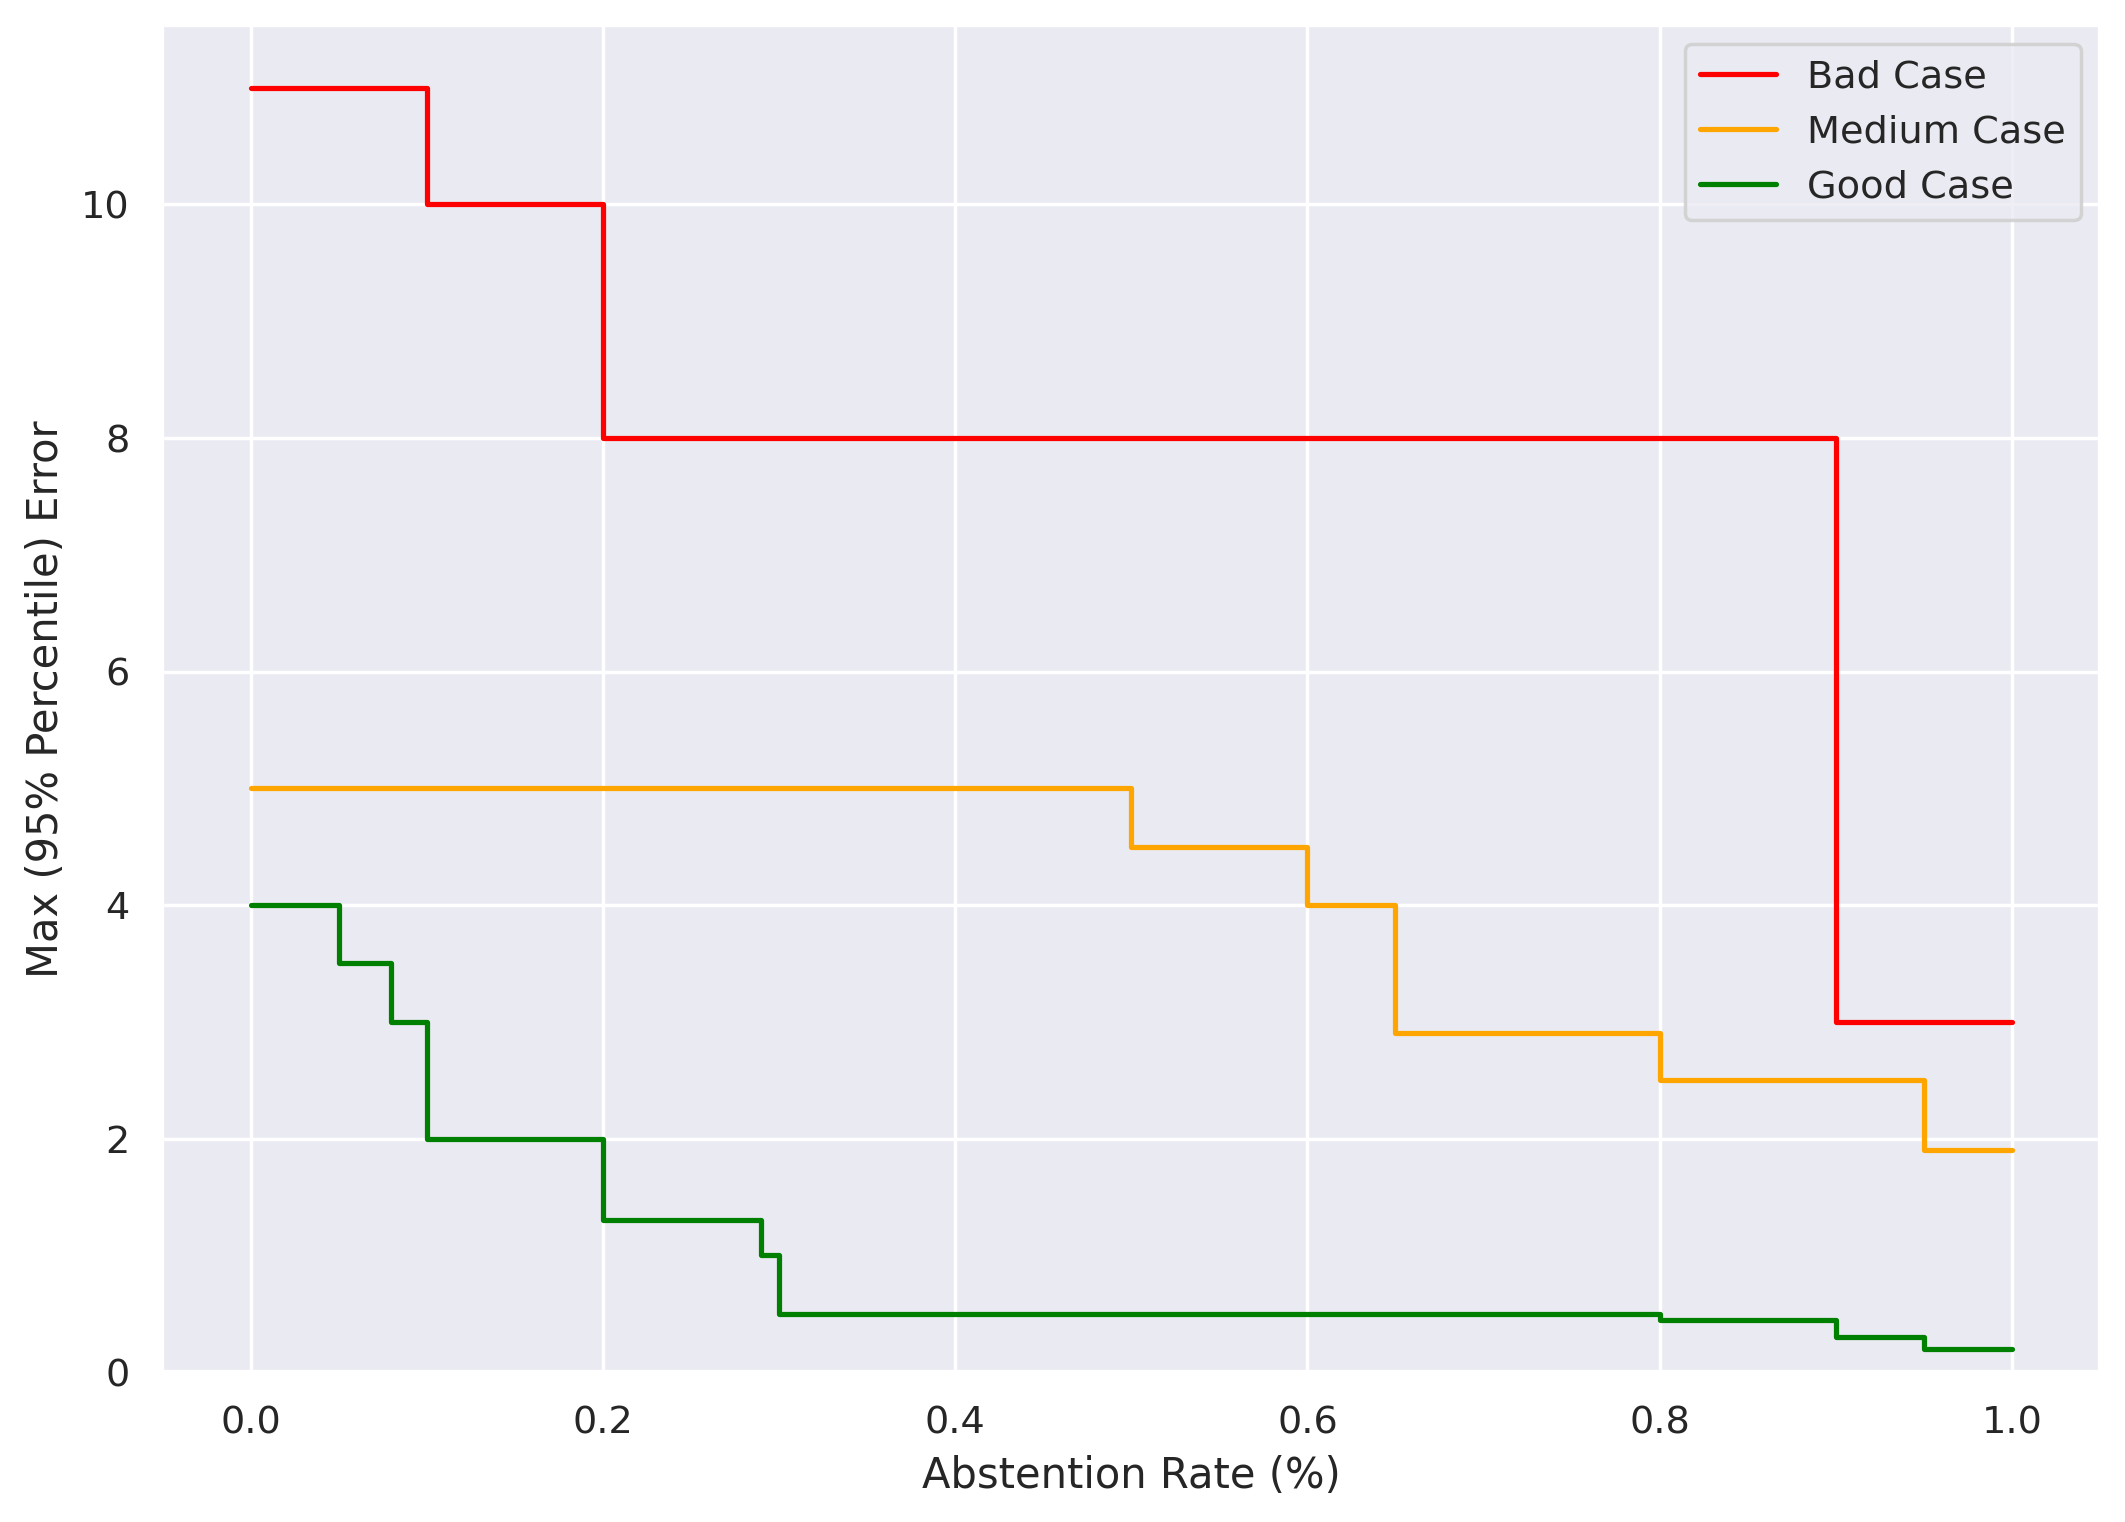

In [3]:
fig, ax = plt.subplots(figsize=(10, 7), dpi=250)
legend_handles = []

for cfg in data:
    abstention_rates = []
    max_errors = []
    for i, abstention_rate, max_error in zip(
        range(len(cfg["abstention_rate"])), cfg["abstention_rate"], cfg["max_error"]
    ):
        # Add ever point (except first/last) twice to produce "stair".
        if abstention_rate > 0 and abstention_rate < 1:
            abstention_rates.append(abstention_rate)
            max_errors.append(cfg["max_error"][i - 1])
        abstention_rates.append(abstention_rate)
        max_errors.append(max_error)
    abstention_rates.append(1)
    max_errors.append(max_errors[-1])

    ax.plot(abstention_rates, max_errors, label=cfg["label"], color=cfg["color"])

ax.set_ylim(bottom=0)
ax.set_xlabel("Abstention Rate (%)")
ax.set_ylabel("Max (95% Percentile) Error")
ax.legend()

fig.show()
